# STOCK/CRPYTO PRICE PREDICTION MODEL

## The following code is an example on how to use simple data analysis tolls in order to set up a simple strategy for long and short term financial trading

### We will make use of the programing language python (3.x) which suits nicely for data anlysis

## --> This a very is simplified model for trading. One should always invest just as much money as one can afford to loose and do own studies in advance. 

## Required modules:
- numpy: the code is designed to be vectorized such that the numpy module can be used and calculations performed fast
- pandas: module for illustrative data frames
- yfinance: api module provided by yahoo finance to get current and previous asset prices
- matplotlib: (sub)module(s) for plots
- scipy: (sub)module for statistical and signal analysis

### CELLS YOU DO NOT NEED TO EXECUTE:

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

### CELLS YOU CAN EXECUTE OPTIONALLY: 

#### --> This does not toggle the output of a cell:

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

### CELLS YOU NEED TO EXECUTE IN ORDER TO BE UP-TO-DATE:

In [ ]:
your_path_to_folder_called_FINANCE = '###INSERT YOUR PATH HERE###'
import sys
sys.path.append(your_path_to_folder_called_FINANCE)

In [3]:
from model import MODEL
import utils, plotting, statistics
import pandas as pd

### CELLS YOU CAN MODIFY:

#### WARNING: Do not mix tickers from different markets/timezones. This can result in various NaN values if a filter is applied!

In [4]:
start_date = '2019-01-01' #your start date for the model.
day_hour = 18 #your intra-day time at which to evaluate the model.
tickers = ['BTC-USD', 'LTC-USD'] #your tickers of interest.
tickers = 'BTC-USD'

### The main part starts here:

In [5]:
model = MODEL(tickers=tickers)
model.get_data(start=start_date, interval='60m')
model.data.tail(2)

[*********************100%***********************]  1 of 1 completed


,BTC-USD
Datetime,
2020-05-24 07:00:00+01:00,9261.337891
2020-05-24 07:51:33+01:00,9254.371094


In [6]:
start_date_range = pd.Timestamp(2019, 1, 1, day_hour)
date_range = utils.create_date_range(start_date=start_date_range)
model.apply_date_filter(date_range)
model.data.tail()

[WARNING]: Filter would result in 10 NaN values.
[USER-INPUT]: Remove NaN values?: y
[INFO]: filter applied.


,BTC-USD
Datetime,
2020-05-19 18:00:00+01:00,9668.282227
2020-05-20 18:00:00+01:00,9528.734375
2020-05-21 18:00:00+01:00,9037.529297
2020-05-22 18:00:00+01:00,9194.690430
2020-05-23 18:00:00+01:00,9184.837891


In [7]:
model.eval_model()

|                                  PRICE MODEL                                   |
|                                  Version 0.3                                   |
|                   Authors: Marco Rosenzweig & Patrick Lorenz                   |
----------------------------------------------------------------------------------
|                              ticker = ['BTC-USD']                              |
|                             start date = 01/01/19                              |
|                              end date = 05/23/20                               |
|                      initial investment per ticker = 200                       |
[INIT]: Initialising model for tickers: ['BTC-USD']
[INIT]: Successfully initialized model.
**********************************************************************************
[TICKER]: BTC-USD
[INFO]: Open position.
[INFO]: 2774.18 tax was paid.
[INFO]: Last entry of "Sell Dates" will be assigned equally as the penultimate one.
------

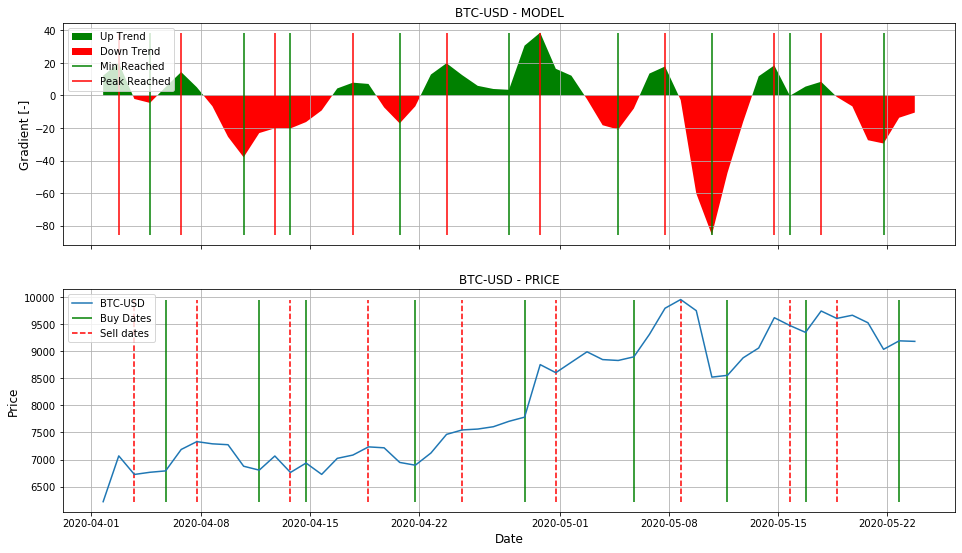

In [8]:
plotting.plot_model(model, tickers='BTC-USD', plot_from_date='2020-04-01')

In [9]:
imag_model = model.copy_model()
imag_model.append_timedelta(timedelta=1)
imag_model.comp_break_values(tickers='all', parallel_computing=True)
imag_model._init_model()

[INFO]: New data was appended.
[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: BTC-USD
[INFO]: Using 10 processes.
[INFO]: Current values: {'BTC-USD': 9184.837890625}
[INFO]: Break values: {'BTC-USD': array([9002.97810039, 9102.17434961])}
[INFO]: Tolerances: {'BTC-USD': array([-181.85979023,  -82.66354102])}
[INIT]: Initialising model for tickers: ['BTC-USD']
[INIT]: Successfully initialized model.
**********************************************************************************


[INFO]: Current ticker: BTC-USD
----------------------------------------------------------------------------------
[INFO]: Result for value: 8890.4408741358


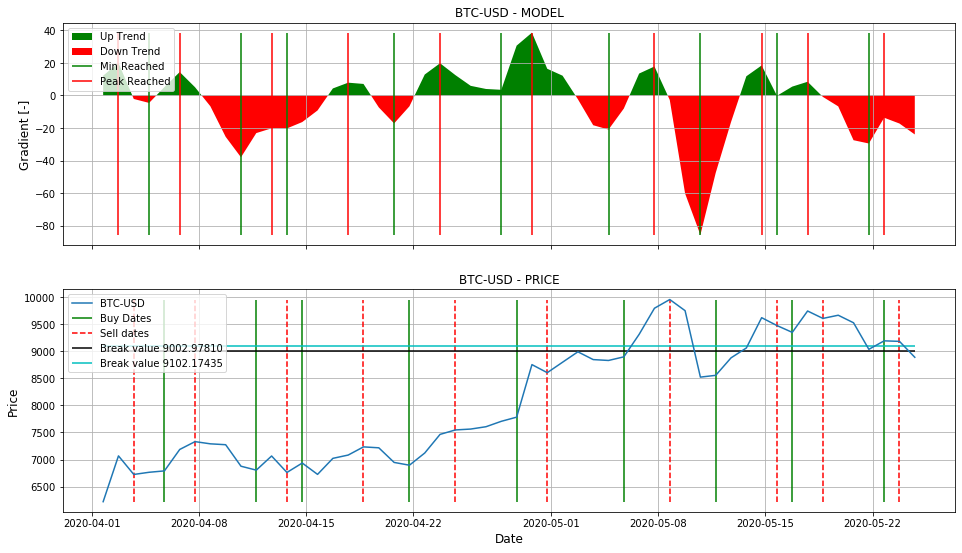

----------------------------------------------------------------------------------
[INFO]: Result for value: 9052.576225000059


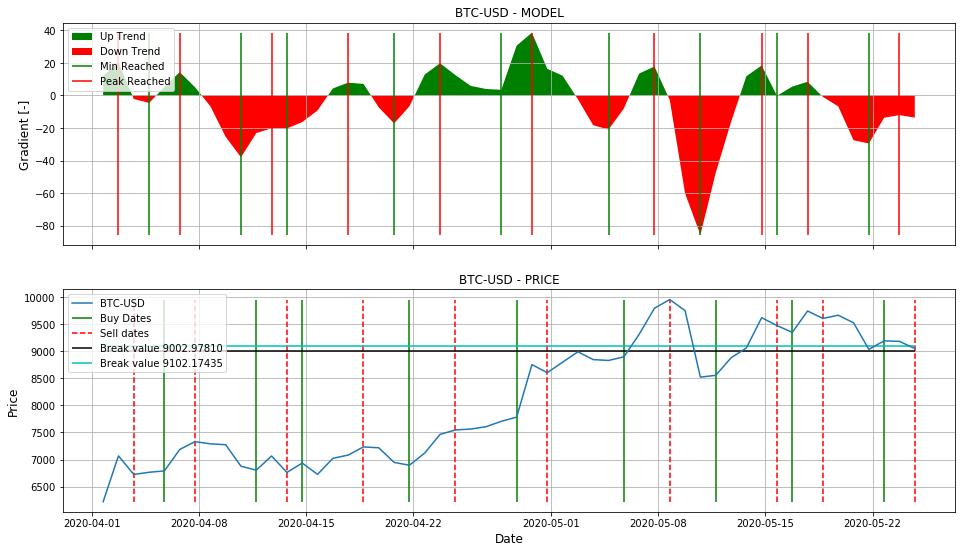

----------------------------------------------------------------------------------
[INFO]: Result for value: 9215.951528979553


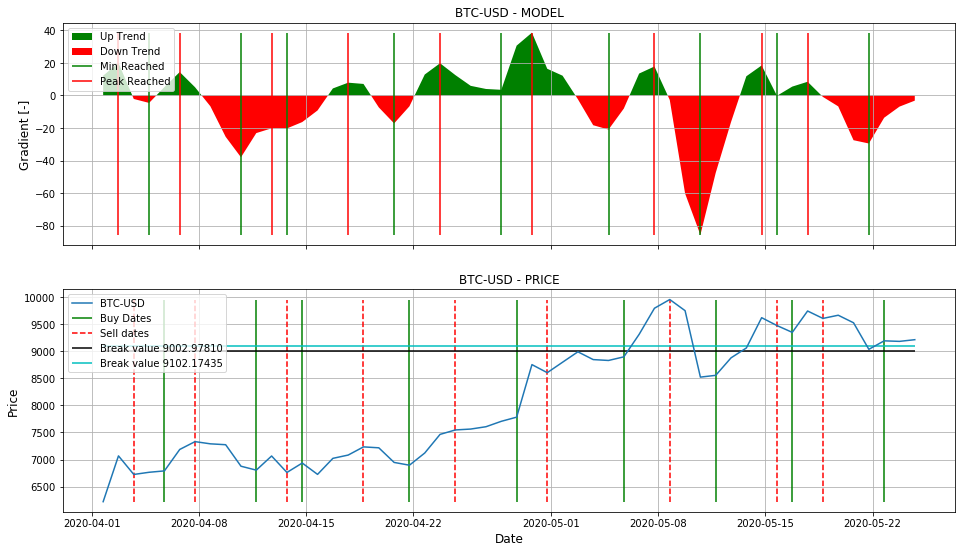

In [10]:
imag_model.show_possibilities(plot_from_date='2020-04-01', switch_axes=False)

[INFO]: Current ticker: BTC-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 9255.53125!
[STATS-INFO]: New tolerances: [-252.55314961 -153.35690039]!
[STATS-EVAL]: Probability for tol=-252.55315: 7.61%
[STATS-EVAL]: Probability for tol=-153.35690: 19.22%
[STATS-EVAL]: Probability between: 11.61%


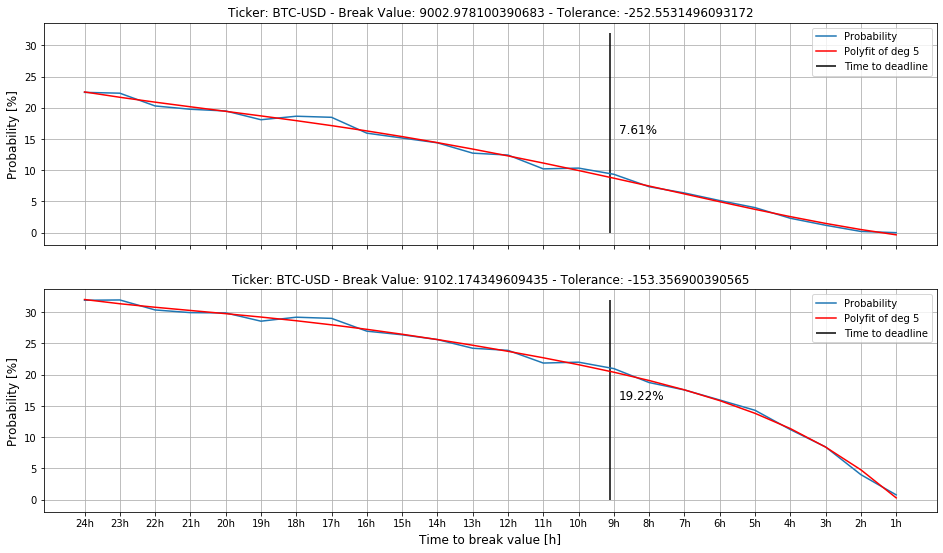

In [11]:
statistics.calc_probs(model=imag_model, tickers='all', auto_update_tolerances=True)

In [12]:
br = pd.read_csv('https://btc.com/stats/diff/export')
blocks = br['height']

In [13]:
halving_values = np.arange(1, 10)
halving_times = 210000
halvings = halving_times * halving_values

In [14]:
halving_values = np.arange(1, 10)
halving_times = 210000
halvings = halving_times * halving_values
#3 halvings
indices = np.zeros(4, dtype='int64')
for index in range(4):
    indices[index] = np.where(blocks < halvings[index])[0][-1]

In [15]:
rewards = np.empty_like(blocks, dtype='float64')
rewards[:indices[0]] = 50
rewards[indices[0]:indices[1]] = 25
rewards[indices[1]:indices[2]] = 12.5
rewards[indices[2]:] = 6.25

In [16]:
total_btc = rewards * blocks
total_btc[indices[0]:indices[1]] = 210000*50 + (blocks[indices[0]:indices[1]] - 210000)*rewards[indices[0]:indices[1]]
total_btc[indices[1]:indices[2]] = 210000*50 + 210000*25 + (blocks[indices[1]:indices[2]] - 420000)*rewards[indices[1]:indices[2]]
total_btc[indices[2]:] = 210000*50 + 210000*25 + 210000*12.5 + (blocks[indices[2]:] - 630000)*rewards[indices[2]:]

In [17]:
#subtract 1e6 satoshi btc
SF = (total_btc.values[total_btc.diff(26).dropna().shape[0]]-1e6) / total_btc.diff(26).dropna()

In [18]:
import math
s2f_model_price = math.exp(-1.84)* SF ** 3.36
sf_model = pd.DataFrame(data={'Stock to Flow':SF, 'Price':s2f_model_price})
sf_model

,Stock to Flow,Price
26,6.394078,80.967742
27,6.394078,80.967742
28,6.394078,80.967742
29,6.394078,80.967742
30,6.394078,80.967742
...,...,...
308,25.576313,8535.591088
309,25.576313,8535.591088
310,25.576313,8535.591088
311,25.332729,8265.508493


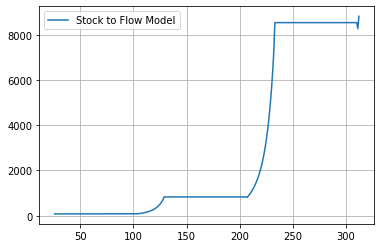

In [21]:
plt.plot(s2f_model_price, label='Stock to Flow Model')
plt.legend()
plt.grid()
plt.show()

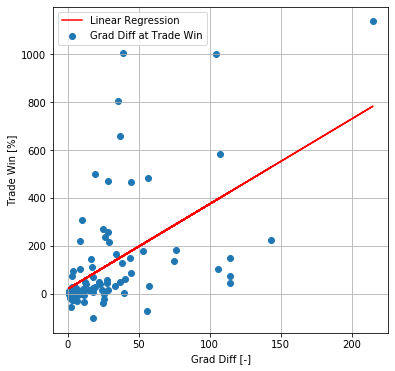

In [22]:
tickers = 'BTC-USD'
grad_at_sell = model.ticker_df[tickers]['Grad at Sell'].dropna().to_numpy()
max_length = grad_at_sell.shape[0]
grad_at_buy = model.ticker_df[tickers]['Grad at Buy'].to_numpy()[:max_length]
grad_diff = model.ticker_df[tickers]['Grad Difference'].to_numpy()[:max_length]
trade_win = model.ticker_df[tickers]['Trade Win'].to_numpy()[:max_length]
#Get linear regression model
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(grad_diff, trade_win)
#Plot stuff
plt.figure(figsize=(6, 6))
plt.scatter(grad_diff, trade_win, label='Grad Diff at Trade Win')
plt.plot(grad_diff, grad_diff*slope + intercept, color='r', label='Linear Regression')
plt.xlabel('Grad Diff [-]')
plt.ylabel('Trade Win [%]')
plt.legend()
plt.grid()
plt.show()

In [23]:
#Create DataFrame of Interest
eval_df = pd.DataFrame(data={'Grad at Sell': grad_at_sell, 'Grad at Buy': grad_at_buy, \
                             'Grad Diff': grad_diff, 'Trade Win': trade_win})
eval_df

,Grad at Sell,Grad at Buy,Grad Diff,Trade Win
0,9.683906,0.636496,9.047411,11.576340
1,2.081615,-23.098980,25.180595,-2.653303
2,5.473483,0.774487,4.698996,3.937657
3,2.860280,-2.767822,5.628102,-0.635283
4,3.125603,1.404741,1.720862,-0.814659
...,...,...,...,...
85,19.786756,-17.171423,36.958178,657.344435
86,38.574129,3.469044,35.105085,805.311582
87,17.787445,-20.963085,38.750530,1004.600766
88,18.442892,-85.632982,104.075874,1000.719486


In [24]:
#Stats of DataFrame
eval_df.describe()

,Grad at Sell,Grad at Buy,Grad Diff,Trade Win
count,90.000000,90.000000,90.000000,90.000000
mean,13.826860,-15.328350,29.155210,123.296689
std,24.891277,27.341941,36.604286,237.647108
min,-33.994523,-111.663754,0.392552,-102.032776
25%,-0.079402,-23.145993,6.155937,1.919377
50%,7.903346,-12.008358,17.637495,27.401134
75%,22.986213,-0.990182,36.451614,143.041220
max,103.409323,48.779919,215.073077,1137.830452


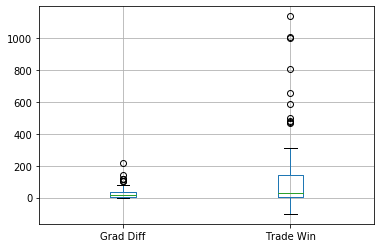

In [28]:
#Box Plots
eval_df.boxplot(column=['Grad Diff', 'Trade Win'])

In [29]:
#Correlation Matrix
eval_df.corr()

,Grad at Sell,Grad at Buy,Grad Diff,Trade Win
Grad at Sell,1.000000,0.020045,0.665037,0.502659
Grad at Buy,0.020045,1.000000,-0.733330,-0.274532
Grad Diff,0.665037,-0.733330,1.000000,0.546878
Trade Win,0.502659,-0.274532,0.546878,1.000000


### Optional: Export model and eval DataFrame to csv file:

In [40]:
csv_name_model = 'OUTPUT/model_{}_{}_{}.csv'.format(tickers, start_date, day_hour)
model.ticker_df['BTC-USD'].to_csv(csv_name_model)

In [41]:
csv_name_eval = 'OUTPUT/eval_{}_{}_{}.csv'.format(tickers, start_date, day_hour)
eval_df.to_csv(csv_name_eval)